In [2]:
from cnnface.stimulus.Image_process import img_similarity,nor
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [ ]:
baseimg = np.array(Image.open(r'D:\cnnface\female_male_test_51_addnoise\Morph_face_gray/frame001.png'))
imgs_name = os.listdir(r'D:\cnnface\female_male_test_51_addnoise\Morph_face_gray')
imgs_path = [os.path.join(r'D:\cnnface\female_male_test_51_addnoise\Morph_face_gray',name) for name in imgs_name]
imgs = [np.array(Image.open(path)) for path in imgs_path]
similarity = [img_similarity(baseimg, img, 'SSIM') for img in imgs]

sns.set_style('darkgrid')
bins = np.arange(0,101,1)
sns.lineplot(x=bins,y=similarity)
plt.show()

In [3]:
from cnnface.analysis.generate_ci import generateCI
sns.set_style('darkgrid')
female = np.array(Image.open(r'D:\cnnface\female_male_test_51_addnoise\Face_template\face_template/female_average_face_gray_512.jpg').convert('L'))
male = np.array(Image.open(r'D:\cnnface\female_male_test_51_addnoise\Face_template\face_template/male_average_face_gray_512.jpg').convert('L'))

bi = np.array(Image.open(r'D:\cnnface\female_male_test_51_addnoise\Face_template\face_template/frame054_gray_512.jpg')).astype('int64')
para_ci = np.load(r'D:\cnnface\female_male_test_51_addnoise\Face_template\meta_data/paras_ci.npy')
ci = generateCI(para_ci)
scales = np.arange(0,100,1)

bi_add = [bi+ci*scale for scale in scales]
bi_sub = [bi-ci*scale for scale in scales]

simis_add = []
simis_sub = []
for i,_ in enumerate(bi_add):
    b_add = bi_add[i]
    b_add[b_add>255] = 255
    b_add[b_add<0] = 0
    
    
    b_sub = bi_sub[i] 
    b_sub[b_sub>255] = 255
    b_sub[b_sub<0] = 0
    
    addimg = Image.fromarray(nor(b_add)*200).convert('L')
    subimg = Image.fromarray(nor(b_sub)*200).convert('L')
    
    addimg.save(r'D:\cnnface\female_male_test_51_addnoise\Face_template\classification_noise\different_scale_ci/morescale//add/ci_add_%04d.jpg' %i)
    subimg.save(r'D:\cnnface\female_male_test_51_addnoise\Face_template\classification_noise\different_scale_ci/morescale/sub/ci_sub_%04d.jpg' %i)
    
    simi_add = img_similarity(female,b_add,'pearson')
    simi_sub = img_similarity(male, b_sub, 'pearson')
    
    simis_add.append(simi_add)
    simis_sub.append(simi_sub)
    
scales = np.tile(scales,(2,))
simis = simis_add + simis_sub
add  =  ['add'] * 100
sub =  ['sub'] * 100
hue = add + sub
sns.lineplot(scales,simis,hue=hue)

In [45]:
barfsas = np.array(simis_add)
print(np.argwhere(barfsas==barfsas.max()))




In [1]:
# 在anconda的python3.6里运行, 记录 平均面孔的代码

from facemorpher import averager,list_imgpaths
import os

prepath = r'D:\cnnface\gender_analysis\train_stimulus\male'
imgs_path = os.listdir(prepath)
target_prepath = r'D:\cnnface\gender_analysis\face_template'

for img_path in imgs_path:
    target_path = os.path.join(target_prepath, img_path + '.png')
    img_path = os.path.join(prepath, img_path)
    averager(list_imgpaths(img_path), None, int(512), int(512), 'transparent', True, target_path)



In [38]:
# 批量移动文件
import os
import shutil

ori_path =r'D:\VGGface2\overlap_vggface2_male'
sub_list= os.listdir(ori_path)

i = 1
for sub in sub_list:
   sub_path = os.path.join(ori_path,sub)
   img_list = os.listdir(sub_path)
   for img in img_list:
       img_path = os.path.join(sub_path,img)
       i_str = str(i).zfill(6)
       tar_path = 'D:\VGGface2\overlap_male/{}.jpg'.format(i_str)
       i = i + 1 
       shutil.move(img_path,tar_path)



In [36]:
# 计算 roc 曲线
    
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual_label = np.random.choice((0,1),(100,))
y_score = np.ones(100)
y_score[:50] = 0

fpr, tpr, threshold = roc_curve(actual_label,y_score)
auc_value = auc(fpr,tpr)
print(auc_value)

plt.figure()
lw = 2
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % auc_value)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [18]:
## 批量移除rcicr生成的 inv 文件
import os
for i in range(9,21):
    prepath = r'D:\cnnface\gender_analysis\noise_stimulus\baseface\part{}'.format(i)
    imgs_list = os.listdir(prepath)
    for img in imgs_list:
        img_split = img.split('_')
        if 'inv.png' in img_split:
            img_path = os.path.join(prepath,img)
            os.remove(img_path)


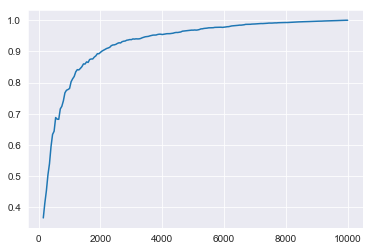

In [6]:
# 生成不同数量label 生成的ci
from cnnface.analysis.generate_ci import cal_ci,generateCI
from cnnface.stimulus.Image_process import nor
from PIL import Image
import numpy as np
from cnnface.stimulus.Image_process import img_similarity
import seaborn as sns
import matplotlib.pyplot as plt

param_20000 = np.load(r'D:\cnnface\gender_analysis\noise_stimulus\metadata/params_20000.npy')
label = np.load(r'D:\cnnface\gender_analysis\noise_stimulus\label/gender_label_20000.npy')
target_path = r'D:\cnnface\gender_analysis\CI_analysis\CIs_img\CIs/ci{}.jpg'
cis = []
for i in range(10000):
    if i%50 == 0 and i > 100:
        param_part = param_20000[:i]
        label_part = label[:i]
        param_ci = cal_ci(param_part, label_part)
        ci = generateCI(param_ci)
        ci_nor = nor(ci) *255
        cis.append(ci_nor)
        ci_img = Image.fromarray(ci_nor).convert('RGB')
        save_path = target_path.format(i)
        #ci_img.save(save_path)

#  绘制不同trials重建的CI 跟最优的CI的相关变化曲线，从而说说明多少trials 图像就较为稳定了。
sns.set_style('darkgrid')

ci_max = cis[-1]
cors = []
for c in cis:
    cor = img_similarity(ci_max,c,method='pearson')
    cors.append(cor)

bins = range(1,10000)
x = [b  for b in bins if b%50 == 0 and b > 100]
x.append(10000)
cors.append(1)
fig = sns.lineplot(x,cors)
plt.savefig('D:\cnnface\gender_analysis\CI_analysis\CIs_img\CIs/corr10000.png',dpi=800)

In [20]:
import numpy as np
from PIL import Image
from cnnface.analysis.generate_ci import generateCI, cal_ci

baseface = Image.open(r'D:\cnnface\gender_analysis\face_template\gray/baseface.jpg')
param_5000 = np.load(r'D:\cnnface\gender_analysis\noise_stimulus\metadata/params_5000.npy')
label = np.load(r'D:\cnnface\gender_analysis\human_result\exp\gender\label\part2/label.npy')

param_1000 = param_5000[1000:2000]

param_ci = cal_ci(param_1000, label[0:1000])

np.save(r'D:\cnnface\gender_analysis\CI_analysis/param_ci_10000_human.npy', param_ci)

ci = generateCI(param_ci)

import matplotlib.pyplot as plt
plt.imshow(ci,cmap='jet')

In [ ]:
import numpy as np
import pandas as pd
import os
from cnnface.analysis.generate_ci import generateCI, cal_ci
import matplotlib.pyplot as plt

def hum_csv2label(csvfile_path):
    humanData = pd.read_csv(csvfile_path, skiprows=1)
    rating = humanData['Rating']
    label_sub = np.array([1 if r == -1 or r == -0.1 else 0 for r in rating])
    return label_sub

prepath = 'D:\cnnface\gender_analysis\human_result\exp\gender\only/part{}'
param_5000 = np.load(r'D:\cnnface\gender_analysis\noise_stimulus\metadata/params_5000.npy')
for i in range(1, 6):
    part_path = prepath.format(i)
    part_sub = os.listdir(part_path)
    for sub in part_sub:
        csv_file_path = os.path.join(part_path, sub)
        label_sub = hum_csv2label(csv_file_path)
        name = sub.split('_')[-1].split('.')[0]
        np.save(r'D:\cnnface\gender_analysis\human_result\CIs\subject/label/label_{}'.format(name),label_sub)
        param_sub = param_5000[(i-1)*1000:i*1000]
        param_ci = cal_ci(param_sub, label_sub)
        np.save(r'D:\cnnface\gender_analysis\human_result\CIs\subject\param_ci/param_ci_{}'.format(name),param_ci)
        ci = generateCI(param_ci)
        np.save(r'D:\cnnface\gender_analysis\human_result\CIs\subject\ci/ci_{}'.format(name),ci)
        plt.imshow(ci,cmap='jet')
        plt.colorbar()
        plt.axis('off')
        plt.show()
        plt.imsave(r'D:\cnnface\gender_analysis\human_result\CIs\subject\ci_img/ci_{}.jpg'.format(name),ci,cmap='jet')
        

In [7]:
# 叠加平均 CI
import numpy as np
import os
from cnnface.stimulus.Image_process import nor

prepath_ci= r'D:\cnnface\gender_analysis\human_result\CIs\subject\ci'
ci_list = os.listdir(prepath_ci)
cis = []
for ci in ci_list:
    ci_path = os.path.join(prepath_ci,ci)
    ci = np.load(ci_path)
    ci_nor = nor(ci) * 255
    cis.append(ci)
cis = np.array(cis)
ci_sum = cis.sum(axis=0)


In [10]:
import matplotlib.pyplot as plt

plt.imshow(ci_sum,cmap='jet')
plt.imsave(r'D:\cnnface\gender_analysis\human_result\CIs\subject/ci_sum.jpg',ci_sum,cmap='jet')

In [6]:
# 叠加平均 CI
import numpy as np
import os
from cnnface.stimulus.Image_process import nor
from cnnface.analysis.generate_ci import generateCI, cal_ci
import matplotlib.pyplot as plt

prepath_ci= r'D:\cnnface\gender_analysis\human_result\CIs\subject\param_ci\param4'
ci_list = os.listdir(prepath_ci)
p_cis = []
for ci in ci_list:
    ci_path = os.path.join(prepath_ci,ci)
    ci = np.load(ci_path)
    ci_nor = nor(ci) * 255
    p_cis.append(ci)
p_cis = np.array(p_cis)
p_ci_sum = p_cis.sum(axis=0)
cixxx = generateCI(p_ci_sum)
plt.imshow(cixxx,cmap='jet')

In [9]:
import numpy as np
from cnnface.analysis.generate_ci import generateCI, cal_ci

rand_label = np.random.choice((0,1),10000)
param_5000 = np.load(r'D:\cnnface\gender_analysis\noise_stimulus\metadata/params_5000.npy').repeat(2,axis=0)
para_ci = cal_ci(param_5000,rand_label)
ci = generateCI(para_ci)
plt.imshow(ci,cmap='jet')

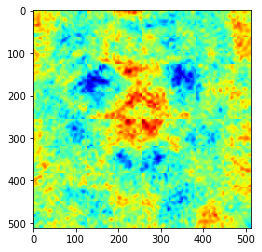

In [30]:
import os 
import numpy as np
from cnnface.behaviour_task.humanData2npy import hum_csv2label
from cnnface.analysis.generate_ci import generateCI, cal_ci
import matplotlib.pyplot as plt

prepath = r'D:\cnnface\gender_analysis\human_result\exp\gender\only/part{}'

label = []
for i in range(1,6):
    part_path = prepath.format(i)
    csv_path = os.path.join(part_path,os.listdir(part_path)[0])
    label_part = hum_csv2label(csv_path)
    label.append(label_part)
label = sum(label,[])
label = np.array(label)

param_5000 = np.load(r'D:\cnnface\gender_analysis\noise_stimulus\metadata/params_5000.npy')
param_ci = cal_ci(param_5000,label)
ci = generateCI(param_ci) *100
plt.imshow(ci,cmap='jet')

In [29]:
ci.min()

nan